## Building OSM

In [1]:
%matplotlib inline

In [2]:
from sqlalchemy import create_engine

import geopandas as gpd

In [3]:
import seaborn as sns

In [4]:
eng = create_engine("postgresql:///osm_quality")

In [5]:
SQLFILE = "/home/dag/src/oslandia-data/osm-data-quality/analyze-building.sql"

### Load Data

In [6]:
# Batiments avec au moins un nom, triés par aire décroissante
with open(SQLFILE) as fobj:
    query = fobj.read()

In [7]:
data = gpd.read_postgis(query, eng)

In [8]:
data.head(10)

,osm_id,building,name,way_area,elem,version,n_user,n_autocorr,n_corr,first_at,last_at,last_uid,last_ug,geom
0,119258782,yes,Ford Aquitaine Industries,254068.0,way,7,5,2,4,2011-06-26,2018-03-23,2526990,4,POLYGON ((-0.6119849000000001 44.9141341004762...
1,164299619,shop,Carrefour,102313.0,way,10,9,1,8,2012-05-20,2018-08-28,8749564,4,POLYGON ((-0.6598157999999998 44.8285522004837...
2,27513914,yes,Hall 1,100803.0,way,9,3,6,2,2008-10-04,2015-10-02,339917,4,"POLYGON ((-0.5779334 44.89282110047812, -0.577..."
3,119247167,yes,Getrag Ford Transmissions,94173.2,way,7,6,1,5,2011-06-26,2018-03-23,2526990,4,"POLYGON ((-0.6171283 44.9154443004761, -0.6148..."
4,109949598,retail,E. Leclerc,91875.6,way,13,9,4,8,2011-04-24,2018-12-10,4897210,3,POLYGON ((-0.6959262999999999 44.8838617004789...
5,167439986,yes,Sabena Technics,84562.3,way,3,3,0,2,2012-06-15,2013-06-19,1562112,3,"POLYGON ((-0.715252 44.84075200048267, -0.7147..."
6,27589401,yes,Base sous-marine de Bordeaux,82897.4,way,15,7,4,10,2008-10-07,2017-10-17,1443767,4,POLYGON ((-0.5603497999999999 44.8701854004801...
7,104056394,yes,Centre commercial Rive droite,80222.6,way,5,5,0,4,2011-03-13,2017-10-31,212494,4,"POLYGON ((-0.519889 44.86710600048038, -0.5198..."
8,9104753,stadium,Matmut Atlantique,79269.3,relation,1,1,0,0,2018-12-13,2018-12-13,8570285,4,POLYGON ((-0.5630353999999999 44.8983345004776...
9,199879849,retail,CDiscount,72176.7,way,4,3,1,2,2013-01-06,2018-02-21,6477358,3,POLYGON ((-0.7572426999999999 44.7086400004934...


In [16]:
# pas de support de sérialisation des dates en JSON
#data_to_write = data.copy()
#data_to_write["first_at"] = data_to_write["first_at"].apply(lambda x: x.isoformat())
#data_to_write["last_at"] = data_to_write["last_at"].apply(lambda x: x.isoformat())

#with open("geo-building.json", "w") as fobj:
#    fobj.write(data_to_write.to_json())

## Map

In [9]:
bordeaux_loc = [44.84042, -0.57001]  # proche du Node

In [10]:
import folium

In [11]:
geojson = data[["osm_id", "version", "way_area", "last_ug", "geom"]].to_json()

In [12]:
geojson[:500]

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"last_ug": 4, "osm_id": 119258782, "version": 7, "way_area": 254068.0}, "geometry": {"type": "Polygon", "coordinates": [[[-0.6119849, 44.914134100476225], [-0.6117698, 44.91409960047622], [-0.6117989, 44.91396550047624], [-0.6114372, 44.913910300476246], [-0.6117013999999998, 44.91258620047635], [-0.6088813999999999, 44.91226340047639], [-0.6086234999999999, 44.91345910047627], [-0.6080964, 44.91340920047627'

In [ ]:
# folium.GeoJson(
#    geojson,
#    name="building").add_to(m)

In [ ]:
# folium.Choropleth(
#     geojson,
#     name="building",
#     data=data[["osm_id", "version"]],
#     columns=["osm_id", "version"],
#     key_on="feature.properties.osm_id",
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="user group"
# ).add_to(m)

In [13]:
m = folium.Map(
    location=bordeaux_loc,
    # tiles='Mapbox Bright',
    tiles="cartodbpositron",
    zoom_start=14
)

In [14]:
colors = sns.color_palette("Set2").as_hex()

def style_user(feature):
    user_group = feature["properties"]["last_ug"]
    return {
        "fillOpacity": 1.,
        "weight": 2,
        "fillColor": colors[user_group],
        "color": colors[user_group]
    }

In [15]:
colors

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

In [16]:
folium.GeoJson(
    data[["osm_id", "last_ug", "geom"]],
    name='building',
    style_function=style_user
).add_to(m)

In [17]:
folium.LayerControl().add_to(m)

m

Groupe
  0      1      2      3      4


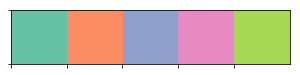

In [18]:
print("Groupe\n  " + "      ".join(str(x) for x in [0, 1, 2, 3, 4]))
sns.palplot(colors[:5])